1. Write a program for pre-processing of a text document such as stop word removal, stemming.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
with open("Sample_1.txt", "r") as file:
    line = file.read()

words = line.split()

print(f"Before Removing Stop Words: \n{words}\nLength: {len(words)}")

Before Removing Stop Words: 
['Taj', 'Mahal', 'is', 'regarded', 'as', 'one', 'of', 'the', 'best', 'examples', 'of', 'Mughal', 'architecture', 'and', 'a', 'symbol', 'of', 'Indian', 'history.', 'The', 'Taj', 'Mahal', 'is', 'a', 'major', 'tourist', 'attraction', 'and', 'attracts', 'more', 'than', 'five', 'million', 'visitors', 'a', 'year.']
Length: 36


In [ ]:
with open('output.txt', 'w') as appendFile:
    for r in words:
        if r not in stop_words:
            appendFile.write(" " + r)

In [ ]:
with open("output.txt", "r") as file:
    line = file.read()

words = line.split()

print(f"After Removing Stop Words: \n{words}\nLength: {len(words)}")

After Removing Stop Words: 
['Taj', 'Mahal', 'regarded', 'one', 'best', 'examples', 'Mughal', 'architecture', 'symbol', 'Indian', 'history.', 'The', 'Taj', 'Mahal', 'major', 'tourist', 'attraction', 'attracts', 'five', 'million', 'visitors', 'year.']
Length: 22


In [ ]:
ps = PorterStemmer()

In [ ]:
for s in words:
    print(f"{s} : {ps.stem(s)}")

Taj : taj
Mahal : mahal
regarded : regard
one : one
best : best
examples : exampl
Mughal : mughal
architecture : architectur
symbol : symbol
Indian : indian
history. : history.
The : the
Taj : taj
Mahal : mahal
major : major
tourist : tourist
attraction : attract
attracts : attract
five : five
million : million
visitors : visitor
year. : year.


In [ ]:
tokenized_words = word_tokenize(line)
print(tokenized_words)

['Taj', 'Mahal', 'regarded', 'one', 'best', 'examples', 'Mughal', 'architecture', 'symbol', 'Indian', 'history', '.', 'The', 'Taj', 'Mahal', 'major', 'tourist', 'attraction', 'attracts', 'five', 'million', 'visitors', 'year', '.']


3. Write a program to construct a Bayesian network considering medical data. Use this model to
demonstrate the diagnosis of heart patients using the standard Heart Disease Data Set (You can use
Java/Python ML library classes/API.)

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [ ]:
# Read Cleveland Heart Disease data
heartDisease = pd.read_csv('heart.csv')

In [ ]:
#Check for missing values
heartDisease.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#Handle missing values
heartDisease = heartDisease.replace('?',np.nan)

In [ ]:
# Display the data
print(f"First few rows from the dataset are: \n\n{heartDisease.head()}")

First few rows from the dataset are: 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  


In [ ]:
# Model Bayesian Network
model = BayesianModel([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),
                       ('fbs','heartdisease'),('heartdisease','restecg'), ('heartdisease','thalach'),('heartdisease','chol')])

In [ ]:
# Learning CPDs using Maximum Likelihood Estimators
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)


Learning CPD using Maximum likelihood estimators


In [ ]:
# Inferencing with Bayesian Network
print('Inferencing with Bayesian Network')
HeartDisease_infer = VariableElimination(model)

Inferencing with Bayesian Network:


In [ ]:
# Computing the Probability of HeartDisease given Age
print('1. Probability of HeartDisease given Age=38')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age':38})
print(q)

1. Probability of HeartDisease given Age=38
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.7026 |
+-----------------+---------------------+
| heartdisease(1) |              0.1024 |
+-----------------+---------------------+
| heartdisease(2) |              0.0577 |
+-----------------+---------------------+
| heartdisease(3) |              0.0631 |
+-----------------+---------------------+
| heartdisease(4) |              0.0741 |
+-----------------+---------------------+


In [ ]:
# Computing the Probability of HeartDisease given cholesterol
print('\n 2. Probability of HeartDisease given cholesterol=230')
q=HeartDisease_infer.query(variables=['heartdisease'], evidence ={'chol':230})
print(q)


 2. Probability of HeartDisease given cholesterol=230
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.3270 |
+-----------------+---------------------+
| heartdisease(2) |              0.3059 |
+-----------------+---------------------+
| heartdisease(3) |              0.0000 |
+-----------------+---------------------+
| heartdisease(4) |              0.3671 |
+-----------------+---------------------+


5. Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
X = pd.read_csv('CC_GENERAL.csv')

In [ ]:
X.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)

In [ ]:
X.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
X['MINIMUM_PAYMENTS'].fillna(X['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-7-c0d301fc859d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['MINIMUM_PAYMENTS'].fillna(X['MINIMUM_PAYMENTS'].median(), inplace=True)


In [ ]:
X['CREDIT_LIMIT'].fillna(X['CREDIT_LIMIT'].median(), inplace=True)

<ipython-input-8-fcd6f5eb7460>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['CREDIT_LIMIT'].fillna(X['CREDIT_LIMIT'].median(), inplace=True)


In [ ]:
X.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Normalizing the data so that the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

In [ ]:
# Converting the numpy array into a pandas
DataFrameX_normalized = pd.DataFrame(X_normalized)

In [ ]:
# Reducing the dimensionality of the Data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

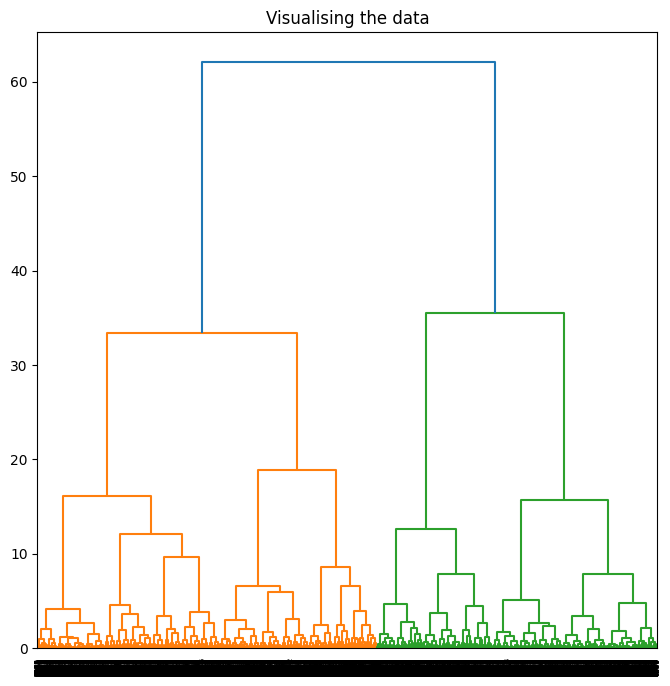

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')

# Dendrograms are used to divide a given cluster into many different clusters
# Creating the dendrogram
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.show()

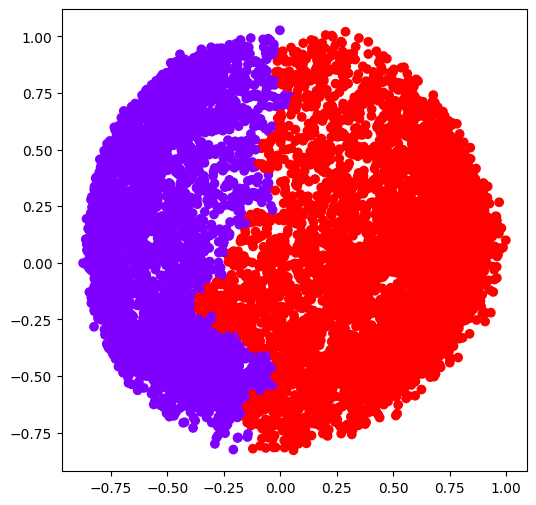

In [ ]:
# Building and Visualizing the different clustering models for different values of k
# k = 2
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

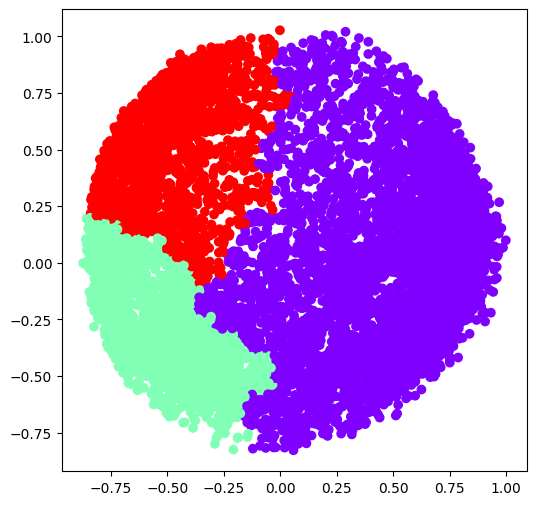

In [ ]:
# k = 3
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

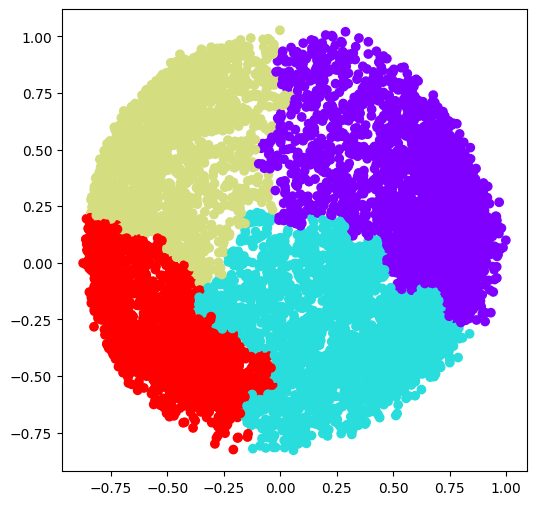

In [ ]:
# k = 4
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

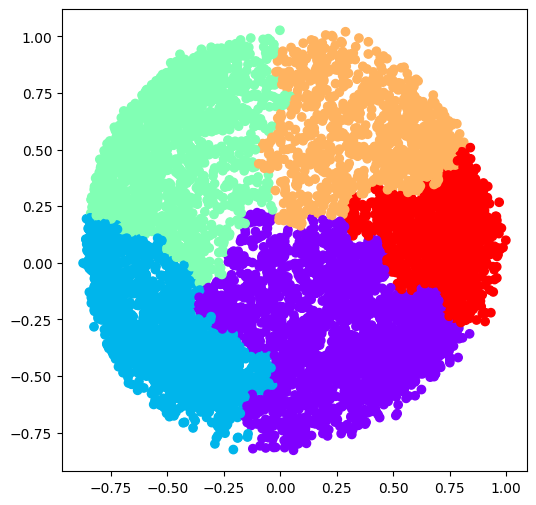

In [ ]:
# k = 5
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

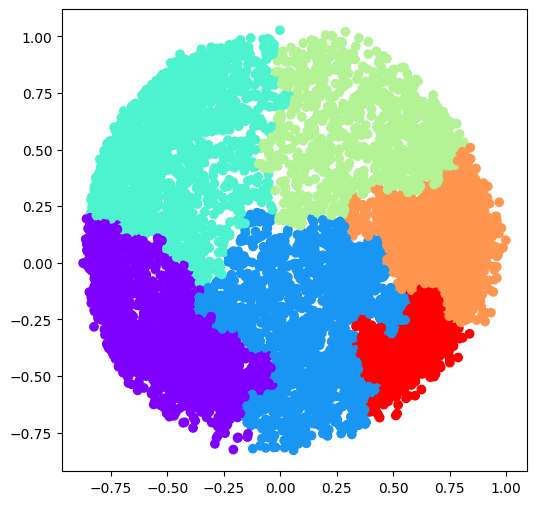

In [ ]:
# k = 6
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],
X_principal['P2'],
c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

6. Implement Page Rank Algorithm.

In [ ]:
# Importing necessary libraries
import numpy as np

# Define the web graph (adjacency matrix)
# Example graph with 4 pages: A, B, C, D
# Links:
# A -> B, A -> D
# B -> C
# C -> A
# D -> B, D -> C

# Define the adjacency matrix for the graph
# Each row represents the links from one page to others
adj_matrix = np.array([
    [0, 1, 0, 1],  # Links from Page A
    [0, 0, 1, 0],  # Links from Page B
    [1, 0, 0, 0],  # Links from Page C
    [0, 1, 1, 0]   # Links from Page D
])

# Number of pages
n = adj_matrix.shape[0]

# Damping factor
d = 0.85

# Initialize the PageRank vector with equal values
page_rank = np.ones(n) / n

# Calculate the out-degree of each page
out_degree = adj_matrix.sum(axis=1)

# Convert adjacency matrix to the probability matrix
for i in range(n):
    for j in range(n):
        if out_degree[i] != 0:
            adj_matrix[i][j] = adj_matrix[i][j] / out_degree[i]
        else:
            adj_matrix[i][j] = 1 / n  # Handling dangling nodes

# Number of iterations
iterations = 100
for _ in range(iterations):
    # Update PageRank values
    new_rank = (1 - d) / n + d * adj_matrix.T @ page_rank
    page_rank = new_rank

# Display the PageRank of each page
print("PageRank Results:")
for i, rank in enumerate(page_rank):
    print(f"Page {chr(65 + i)}: {rank:.4f}")

PageRank Results:
Page A: 0.0965
Page B: 0.0375
Page C: 0.0694
Page D: 0.0375


7. Build the web crawler to pull product information and links from an e-commerce website.

In [ ]:
!pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
# Step 1: Choose the e-commerce website URL (Books to Scrape)
url = 'https://books.toscrape.com/'

In [ ]:
# Step 2: Send an HTTP request and parse the HTML
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# Step 3: Extract book information (title, price, and link)
books = []
for item in soup.find_all('article', class_='product_pod'):
    # Get book title
    title = item.find('h3').text.strip()

    # Get book link
    link = item.find('a')['href']
    link = 'https://books.toscrape.com/' + link  # Add base URL to complete the link

    # Get book price
    price = item.find('p', class_='price_color').text.strip()

    # Append the extracted data into the books list
    books.append({
        'Book_Title': title,
        'Price': price,
        'Book_Link': link
    })

In [ ]:
# Step 4: Create a DataFrame from the extracted data
df = pd.DataFrame(books)

# Step 5: Print the DataFrame to check the output
print(df.head())

                     Book_Title    Price  \
0            A Light in the ...  Â£51.77   
1            Tipping the Velvet  Â£53.74   
2                    Soumission  Â£50.10   
3                 Sharp Objects  Â£47.82   
4  Sapiens: A Brief History ...  Â£54.23   

                                           Book_Link  
0  https://books.toscrape.com/catalogue/a-light-i...  
1  https://books.toscrape.com/catalogue/tipping-t...  
2  https://books.toscrape.com/catalogue/soumissio...  
3  https://books.toscrape.com/catalogue/sharp-obj...  
4  https://books.toscrape.com/catalogue/sapiens-a...  


In [ ]:
# Step 6: Save the DataFrame to a CSV file
df.to_csv('books.csv', index=False, encoding='utf-8')
print(f'{len(books)} books extracted and saved to books.csv.')

20 books extracted and saved to books.csv.


In [ ]:
file = pd.read_csv('books.csv')

In [ ]:
file.head()

,Book_Title,Price,Book_Link
0,A Light in the ...,Â£51.77,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,Â£53.74,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,Â£50.10,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,Â£47.82,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History ...,Â£54.23,https://books.toscrape.com/catalogue/sapiens-a...
